In [39]:
import os
import pandas as pd
import matplotlib.pyplot
import glob

In [46]:
# 2. What’s in the current folder?
print("Files here:", os.listdir())

Files here: ['.ipynb_checkpoints', 'CM3020_AI_MID_TERM_GRAPH_PLOTTING.ipynb', 'elite_fraction_experiment_results.csv', 'mutation_rate_experiment_results.csv', 'population_size_experiment_results.csv']


In [48]:
print("CWD:", os.getcwd())
print("CSV files:", glob.glob("*.csv"))

CWD: C:\Users\leeyh\CM3020_AI_MID_TERM_GRAPH_PLOTTING
CSV files: ['elite_fraction_experiment_results.csv', 'mutation_rate_experiment_results.csv', 'population_size_experiment_results.csv']


In [52]:
# 2. Read & tag each CSV by filename:
df_list = []
for fn in glob.glob("*.csv"):
    df = pd.read_csv(fn)
    # strip the “_experiment_results.csv” suffix to get a nice category name
    category = fn.replace("_experiment_results.csv","")
    df['category'] = category
    df_list.append(df)

all_df.to_csv("combined_experiment_results.csv", index=False)
print("Combined CSV written to combined_experiment_results.csv")

Combined CSV written to combined_experiment_results.csv


In [54]:
# 1. Read in your combined file
df = pd.read_csv("combined_experiment_results.csv")

# 2. Map the three experiment names to nicer labels
mapping = {
    "elite_fraction":   "elite fraction",   # first block of rows
    "mutation_rate":    "mutation rate",    # middle block
    "population_size":  "pop_size"          # last block
}
df["experiment_type"] = df["category"].map(mapping)

# 3. (Optional) drop the old column if you don’t need it
# df = df.drop(columns="category")

# 4. Save out the newly‐labeled DataFrame
df.to_csv("categorized_results.csv", index=False)
print("Wrote combined_labeled_results.csv with new 'experiment_type' column")

Wrote combined_labeled_results.csv with new 'experiment_type' column


In [55]:
df_rounded = pd.read_csv("categorized_results.csv")

fitness_cols = [col for col in df_rounded.columns if col.endswith('_best') or col.endswith('_avg')]

df_rounded[fitness_cols] = df_rounded[fitness_cols].round(4)

output_path = 'categorized_results_rounded.csv'
df_rounded.to_csv(output_path, index=False)

In [57]:
df_final = pd.read_csv("categorized_results_rounded.csv")

df_final.head(10)

,pop_size,gene_count,mutation_rate,elite_fraction,gen_0_best,gen_1_best,gen_2_best,gen_3_best,gen_4_best,gen_0_avg,gen_1_avg,gen_2_avg,gen_3_avg,gen_4_avg,category,Unnamed: 14,experiment_type
0,10,3,0.05,0.6,2.5139,2.6868,0.5095,3.5303,1.8784,0.4511,0.4626,0.1296,0.5322,0.2662,elite_fraction,NaN,elite fraction
1,10,3,0.05,0.4,2.6514,1.8714,0.2128,3.3265,0.4538,0.3613,0.6017,0.1111,0.4101,0.2137,elite_fraction,NaN,elite fraction
2,10,3,0.05,0.2,0.5232,3.6128,4.0786,2.4123,2.5042,0.1891,0.9152,0.7314,0.3477,0.6735,elite_fraction,NaN,elite fraction
3,5,3,0.20,0.4,0.1100,0.0494,0.0291,0.0768,0.0290,0.0465,0.0188,0.0147,0.0302,0.0152,mutation_rate,NaN,mutation rate
4,5,3,0.10,0.4,0.0282,0.4979,0.4798,0.0291,0.0508,0.0066,0.1265,0.1289,0.0215,0.0291,mutation_rate,NaN,mutation rate
5,5,3,0.05,0.4,0.0604,0.0375,0.0561,0.0504,0.5853,0.0266,0.0205,0.0192,0.0270,0.1271,mutation_rate,NaN,mutation rate
6,5,3,0.05,0.4,3.7800,2.3266,1.1527,3.6371,2.5171,2.0773,0.8631,0.7480,1.2634,1.4348,population_size,NaN,pop_size
7,10,3,0.05,0.4,4.2867,3.7584,2.9615,3.4810,2.3157,1.7316,1.2259,1.1054,1.3775,1.3612,population_size,NaN,pop_size
8,15,3,0.05,0.4,5.0401,4.5767,3.9967,3.6489,5.2220,2.0319,1.2805,1.2595,1.2853,2.3273,population_size,NaN,pop_size


In [60]:
generation_nums = sorted({int(col.split('_')[1]) 
                          for col in df_final.columns if col.startswith('gen_')})


experiment_types = df_final['experiment_type'].unique().tolist()

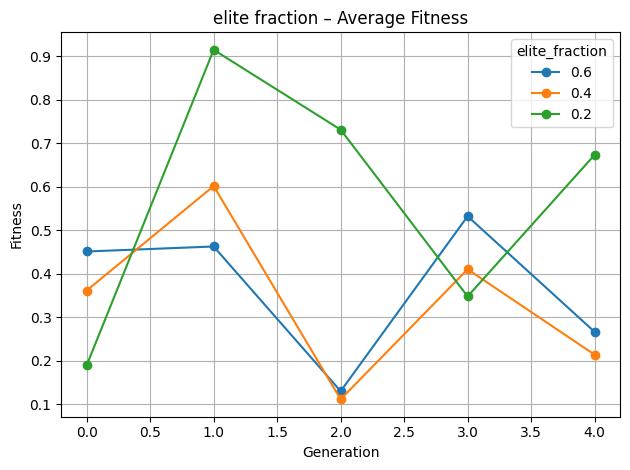

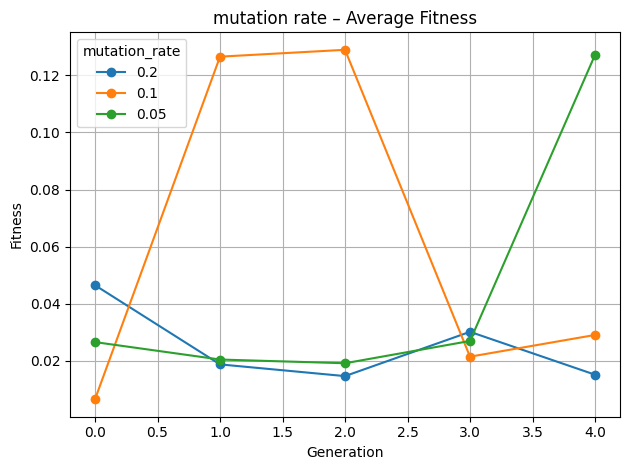

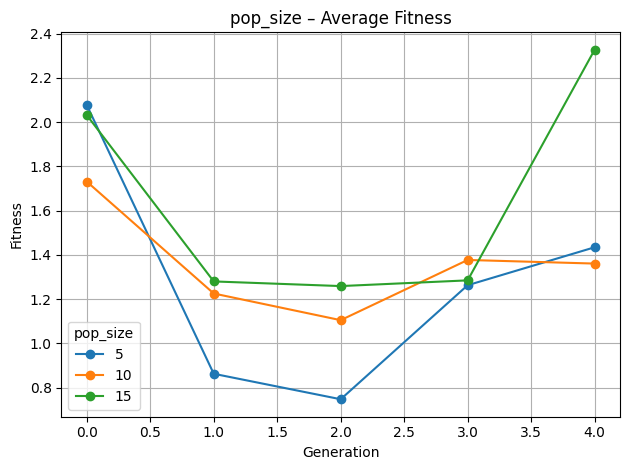

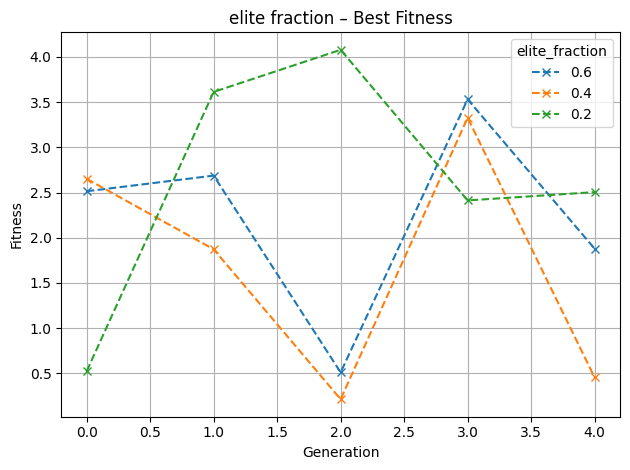

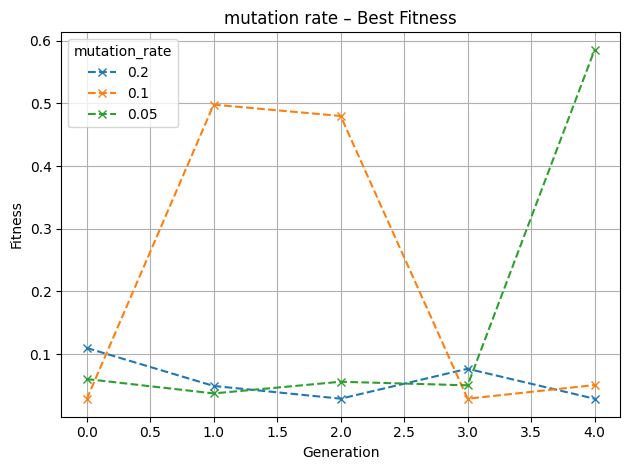

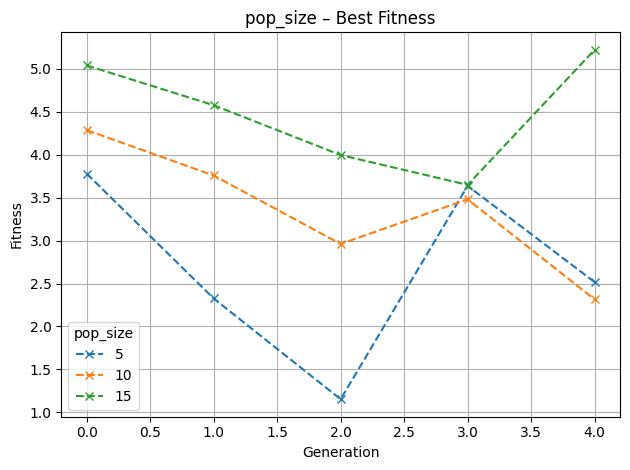

In [62]:
for fitness_type in ['avg', 'best']:
    suffix = f"_{fitness_type}"
    for exp in experiment_types:
        df_exp = df_final[df_final['experiment_type'] == exp]
        param_col = exp.replace(' ', '_')
        
        plt.figure()
        for _, row in df_exp.iterrows():
            val = row[param_col]
            y = [row[f'gen_{g}{suffix}'] for g in generation_nums]
            style = '-' if fitness_type == 'avg' else '--'
            marker = 'o' if fitness_type == 'avg' else 'x'
            plt.plot(generation_nums, y, linestyle=style, marker=marker, label=str(val))

        plt.title(f"{exp} – {'Average' if fitness_type=='avg' else 'Best'} Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.legend(title=param_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()